In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
kaggle_pos_ig_df = pd.read_csv("kaggle_pos_tags_importance_scores_df.csv",index_col=False)
twitter_rac_pos_ig_df = pd.read_csv("twitter_racism_pos_tags_importance_scores_df.csv",index_col=False)
twitter_sex_pos_ig_df = pd.read_csv("twitter_sexism_pos_tags_importance_scores_df.csv",index_col=False)
wtp_agg_pos_ig_df = pd.read_csv("wtp_agg_pos_tags_importance_scores_df.csv",index_col=False)
wtp_tox_pos_ig_df = pd.read_csv("wtp_tox_pos_tags_importance_scores_df.csv",index_col=False)

In [19]:
kaggle_pos_ig_df.head(10)

,Unnamed: 0,POS_tag,mean_importance_score
0,0,ADJ,0.023349
1,1,PRON,0.172220
2,2,NOUN,0.012460
3,3,VERB,0.018559
4,4,ADV,0.023158
5,5,PROPN,0.016009
6,6,DET,0.161677
7,7,PUNC,0.366827
8,8,AUX,0.484410
9,9,ADP,0.016069


In [20]:
twitter_rac_pos_ig_df.head(10)

,Unnamed: 0,POS_tag,mean_importance_score
0,0,ADJ,0.034743
1,1,PRON,0.070356
2,2,NOUN,0.008439
3,3,VERB,0.006776
4,4,ADV,0.042492
5,5,PROPN,0.013973
6,6,DET,0.124886
7,7,PUNC,0.524175
8,8,AUX,0.270679
9,9,ADP,0.136549


In [21]:
wtp_tox_pos_ig_df.head(10)

,Unnamed: 0,POS_tag,mean_importance_score
0,0,ADJ,0.006465
1,1,PRON,0.057216
2,2,NOUN,0.004070
3,3,VERB,0.007651
4,4,ADV,0.011863
5,5,PROPN,0.004939
6,6,DET,0.019501
7,7,PUNC,0.113171
8,8,AUX,0.325948
9,9,ADP,0.009281


## wTP-agg vs WTP-tox

In [22]:
stats.wilcoxon(wtp_tox_pos_ig_df.mean_importance_score, wtp_agg_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=9.0, pvalue=0.064453125)

## WTP-tox vs twitter-rac

In [23]:
stats.wilcoxon(wtp_tox_pos_ig_df.mean_importance_score, twitter_rac_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=8.0, pvalue=0.048828125)

## WTP-tox vs twitter-sex

In [24]:
stats.wilcoxon(wtp_tox_pos_ig_df.mean_importance_score, twitter_sex_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

## WTP-tox vs ATP-agg

## WTP-agg vs twitter-rac

In [25]:
stats.wilcoxon(wtp_agg_pos_ig_df.mean_importance_score, twitter_rac_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

## wTP-agg vs twitter-sex

In [26]:
stats.wilcoxon(wtp_agg_pos_ig_df.mean_importance_score, twitter_sex_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

## twitter-racism vs twitter-sex

In [27]:
stats.wilcoxon(twitter_rac_pos_ig_df.mean_importance_score, twitter_sex_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=26.0, pvalue=0.921875)

## Kaggle insults vs WTP-agg

In [28]:
stats.wilcoxon(wtp_agg_pos_ig_df.mean_importance_score, kaggle_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

## kaggle vs WTP-tox

In [29]:
stats.wilcoxon(wtp_tox_pos_ig_df.mean_importance_score, kaggle_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

## kaggle vs Twitter-rac

In [30]:
stats.wilcoxon(twitter_rac_pos_ig_df.mean_importance_score, kaggle_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=25.0, pvalue=0.845703125)

## kaggle vs twitter-sex

In [31]:
stats.wilcoxon(twitter_sex_pos_ig_df.mean_importance_score, kaggle_pos_ig_df.mean_importance_score)

WilcoxonResult(statistic=21.0, pvalue=0.556640625)

## friedman test

In [32]:
stats.friedmanchisquare(twitter_rac_pos_ig_df.mean_importance_score, twitter_sex_pos_ig_df.mean_importance_score, 
                      wtp_agg_pos_ig_df.mean_importance_score, wtp_tox_pos_ig_df.mean_importance_score )

FriedmanchisquareResult(statistic=20.639999999999986, pvalue=0.0001250447794753776)

In [33]:
kaggle_pos_ig_df.columns

Index(['Unnamed: 0', 'POS_tag', 'mean_importance_score'], dtype='object')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


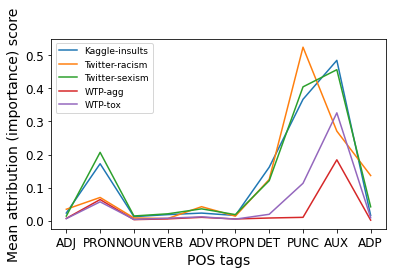

In [34]:
plt.subplots(figsize=(6, 3.5))
plt.plot(kaggle_pos_ig_df.POS_tag,kaggle_pos_ig_df.mean_importance_score, label="Kaggle-insults")
plt.plot(twitter_rac_pos_ig_df.POS_tag,twitter_rac_pos_ig_df.mean_importance_score, label="Twitter-racism")
plt.plot(twitter_sex_pos_ig_df.POS_tag,twitter_sex_pos_ig_df.mean_importance_score, label="Twitter-sexism")
plt.plot(wtp_agg_pos_ig_df.POS_tag,wtp_agg_pos_ig_df.mean_importance_score, label="WTP-agg")
plt.plot(wtp_tox_pos_ig_df.POS_tag,wtp_tox_pos_ig_df.mean_importance_score,label= "WTP-tox")

plt.ylabel("Mean attribution (importance) score", fontsize=14)
plt.xlabel("POS tags",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left',fontsize=9, ncol=1)
plt.savefig("pos-tags.eps",format='eps',bbox_inches='tight')

## plotting POS tags seperately

## read POS files

In [42]:
kaggle_adj_ig_df = pd.read_csv("kaggle_adj_tags_importance_scores_df.csv",index_col=False)
twitter_rac_adj_ig_df = pd.read_csv("twitter_rac_adj_tags_importance_scores_df.csv",index_col=False)
twitter_sex_adj_ig_df = pd.read_csv("twitter_sex_adj_tags_importance_scores_df.csv",index_col=False)
wtp_agg_adj_ig_df = pd.read_csv("wtp-agg_adj_tags_importance_scores_df.csv",index_col=False)
wtp_tox_adj_ig_df = pd.read_csv("wtp-tox_adj_tags_importance_scores_df.csv",index_col=False)

kaggle_pron_ig_df = pd.read_csv("kaggle_pron_tags_importance_scores_df.csv",index_col=False)
twitter_rac_pron_ig_df = pd.read_csv("twitter_rac_pron_tags_importance_scores_df.csv",index_col=False)
twitter_sex_pron_ig_df = pd.read_csv("twitter_sex_pron_tags_importance_scores_df.csv",index_col=False)
wtp_agg_pron_ig_df = pd.read_csv("wtp-agg_pron_tags_importance_scores_df.csv",index_col=False)
wtp_tox_pron_ig_df = pd.read_csv("wtp-tox_pron_tags_importance_scores_df.csv",index_col=False)

kaggle_noun_ig_df = pd.read_csv("kaggle_noun_tags_importance_scores_df.csv",index_col=False)
twitter_rac_noun_ig_df = pd.read_csv("twitter_rac_noun_tags_importance_scores_df.csv",index_col=False)
twitter_sex_noun_ig_df = pd.read_csv("twitter_sex_noun_tags_importance_scores_df.csv",index_col=False)
wtp_agg_noun_ig_df = pd.read_csv("wtp-agg_noun_tags_importance_scores_df.csv",index_col=False)
wtp_tox_noun_ig_df = pd.read_csv("wtp-tox_noun_tags_importance_scores_df.csv",index_col=False)

kaggle_verb_ig_df = pd.read_csv("kaggle_verb_tags_importance_scores_df.csv",index_col=False)
twitter_rac_verb_ig_df = pd.read_csv("twitter_rac_verb_tags_importance_scores_df.csv",index_col=False)
twitter_sex_verb_ig_df = pd.read_csv("twitter_sex_verb_tags_importance_scores_df.csv",index_col=False)
wtp_agg_verb_ig_df = pd.read_csv("wtp-agg_verb_tags_importance_scores_df.csv",index_col=False)
wtp_tox_verb_ig_df = pd.read_csv("wtp-tox_verb_tags_importance_scores_df.csv",index_col=False)

kaggle_adv_ig_df = pd.read_csv("kaggle_adv_tags_importance_scores_df.csv",index_col=False)
twitter_rac_adv_ig_df = pd.read_csv("twitter_rac_adv_tags_importance_scores_df.csv",index_col=False)
twitter_sex_adv_ig_df = pd.read_csv("twitter_sex_adv_tags_importance_scores_df.csv",index_col=False)
wtp_agg_adv_ig_df = pd.read_csv("wtp-agg_adv_tags_importance_scores_df.csv",index_col=False)
wtp_tox_adv_ig_df = pd.read_csv("wtp-tox_adv_tags_importance_scores_df.csv",index_col=False)

kaggle_propn_ig_df = pd.read_csv("kaggle_propn_tags_importance_scores_df.csv",index_col=False)
twitter_rac_propn_ig_df = pd.read_csv("twitter_rac_propn_tags_importance_scores_df.csv",index_col=False)
twitter_sex_propn_ig_df = pd.read_csv("twitter_sex_propn_tags_importance_scores_df.csv",index_col=False)
wtp_agg_propn_ig_df = pd.read_csv("wtp-agg_propn_tags_importance_scores_df.csv",index_col=False)
wtp_tox_propn_ig_df = pd.read_csv("wtp-tox_propn_tags_importance_scores_df.csv",index_col=False)

kaggle_det_ig_df = pd.read_csv("kaggle_det_tags_importance_scores_df.csv",index_col=False)
twitter_rac_det_ig_df = pd.read_csv("twitter_rac_det_tags_importance_scores_df.csv",index_col=False)
twitter_sex_det_ig_df = pd.read_csv("twitter_sex_det_tags_importance_scores_df.csv",index_col=False)
wtp_agg_det_ig_df = pd.read_csv("wtp-agg_det_tags_importance_scores_df.csv",index_col=False)
wtp_tox_det_ig_df = pd.read_csv("wtp-tox_det_tags_importance_scores_df.csv",index_col=False)

kaggle_punc_ig_df = pd.read_csv("kaggle_punc_tags_importance_scores_df.csv",index_col=False)
twitter_rac_punc_ig_df = pd.read_csv("twitter_rac_punc_tags_importance_scores_df.csv",index_col=False)
twitter_sex_punc_ig_df = pd.read_csv("twitter_sex_punc_tags_importance_scores_df.csv",index_col=False)
wtp_agg_punc_ig_df = pd.read_csv("wtp-agg_punc_tags_importance_scores_df.csv",index_col=False)
wtp_tox_punc_ig_df = pd.read_csv("wtp-tox_punc_tags_importance_scores_df.csv",index_col=False)

kaggle_aux_ig_df = pd.read_csv("kaggle_aux_tags_importance_scores_df.csv",index_col=False)
twitter_rac_aux_ig_df = pd.read_csv("twitter_rac_aux_tags_importance_scores_df.csv",index_col=False)
twitter_sex_aux_ig_df = pd.read_csv("twitter_sex_aux_tags_importance_scores_df.csv",index_col=False)
wtp_agg_aux_ig_df = pd.read_csv("wtp-agg_aux_tags_importance_scores_df.csv",index_col=False)
wtp_tox_aux_ig_df = pd.read_csv("wtp-tox_aux_tags_importance_scores_df.csv",index_col=False)

kaggle_adp_ig_df = pd.read_csv("kaggle_adp_tags_importance_scores_df.csv",index_col=False)
twitter_rac_adp_ig_df = pd.read_csv("twitter_rac_adp_tags_importance_scores_df.csv",index_col=False)
twitter_sex_adp_ig_df = pd.read_csv("twitter_sex_adp_tags_importance_scores_df.csv",index_col=False)
wtp_agg_adp_ig_df = pd.read_csv("wtp-agg_adp_tags_importance_scores_df.csv",index_col=False)
wtp_tox_adp_ig_df = pd.read_csv("wtp-tox_adp_tags_importance_scores_df.csv",index_col=False)

In [40]:
kaggle_adj_ig_df.index

RangeIndex(start=0, stop=4230, step=1)

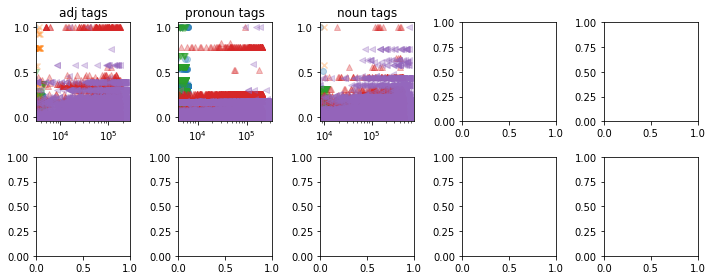

In [63]:
fig, axs = plt.subplots(figsize=(10, 4),ncols=5, nrows=2)
axs[0, 0].scatter(kaggle_adj_ig_df.index, kaggle_adj_ig_df.adj_attribution, marker="o", label="kaggle", alpha=.3)
axs[0, 0].scatter(twitter_rac_adj_ig_df.index, twitter_rac_adj_ig_df.adj_attribution, marker="x", label="twitter-rac", alpha=.3)
axs[0, 0].scatter(twitter_sex_adj_ig_df.index, twitter_sex_adj_ig_df.adj_attribution, marker="v", label="twitter-sex", alpha=.3)
axs[0, 0].scatter(wtp_agg_adj_ig_df.index, wtp_agg_adj_ig_df.adj_attribution, marker="^", label="wtp-agg", alpha=.3)
axs[0, 0].scatter(wtp_tox_adj_ig_df.index, wtp_tox_adj_ig_df.adj_attribution, marker="<", label="wtp-tox", alpha=.3)
axs[0, 0].set_title("adj tags")
axs[0, 0].set_xscale('log')
#axs[0, 0].legend()
axs[0, 1].scatter(kaggle_pron_ig_df.index, kaggle_pron_ig_df.pron_attribution, marker="o", label="kaggle", alpha=.3)
axs[0, 1].scatter(twitter_rac_pron_ig_df.index, twitter_rac_pron_ig_df.pron_attribution, marker="x", label="twitter-rac", alpha=.3)
axs[0, 1].scatter(twitter_sex_pron_ig_df.index, twitter_sex_pron_ig_df.pron_attribution, marker="v", label="twitter-sex", alpha=.3)
axs[0, 1].scatter(wtp_agg_pron_ig_df.index, wtp_agg_pron_ig_df.pron_attribution, marker="^", label="wtp-agg", alpha=.3)
axs[0, 1].scatter(wtp_tox_pron_ig_df.index, wtp_tox_pron_ig_df.pron_attribution, marker="<", label="wtp-tox", alpha=.3)
axs[0, 1].set_title("pronoun tags")
axs[0, 1].set_xscale('log')
#axs[0, 1].legend()
axs[0, 2].scatter(kaggle_noun_ig_df.index, kaggle_noun_ig_df.noun_attribution, marker="o", label="kaggle", alpha=.3)
axs[0, 2].scatter(twitter_rac_noun_ig_df.index, twitter_rac_noun_ig_df.noun_attribution, marker="x", label="twitter-rac", alpha=.3)
axs[0, 2].scatter(twitter_sex_noun_ig_df.index, twitter_sex_noun_ig_df.noun_attribution, marker="v", label="twitter-sex", alpha=.3)
axs[0, 2].scatter(wtp_agg_noun_ig_df.index, wtp_agg_noun_ig_df.noun_attribution, marker="^", label="wtp-agg", alpha=.3)
axs[0, 2].scatter(wtp_tox_noun_ig_df.index, wtp_tox_noun_ig_df.noun_attribution, marker="<", label="wtp-tox", alpha=.3)
axs[0, 2].set_title("noun tags")
axs[0, 2].set_xscale('log')
#axs[0, 2].legend()
fig.tight_layout()

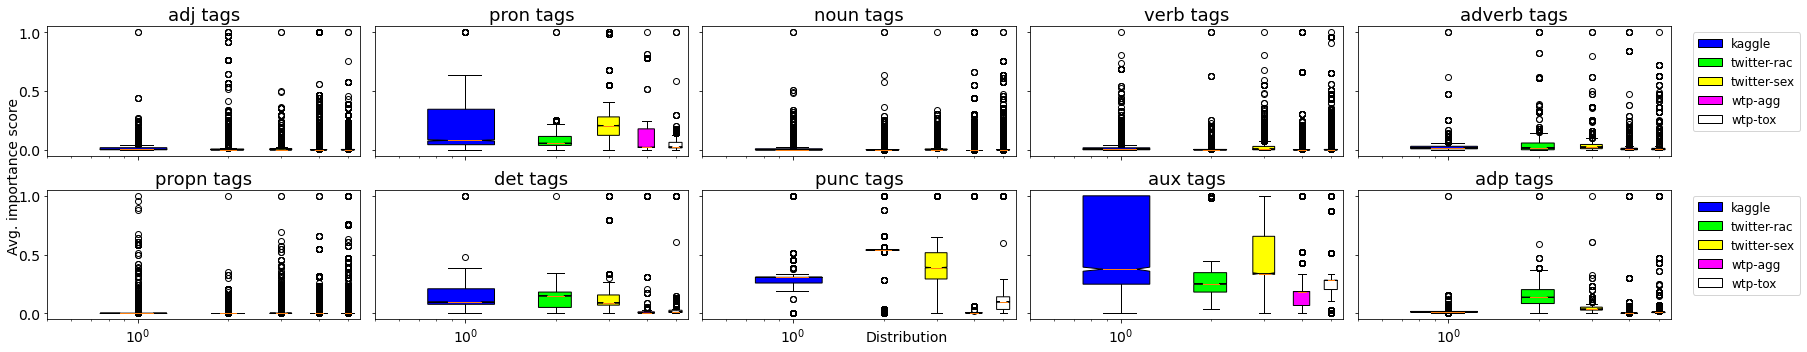

In [156]:
bbox_fig, axs = plt.subplots(figsize=(25, 5),ncols=5, nrows=2, sharex=True, sharey=True)
bbox_fig.text(0.5, 0.04, 'Distribution', ha='center', fontsize=14)
bbox_fig.text(0.00, 0.5, 'Avg. importance score', va='center', rotation='vertical', fontsize=14)
adj_coll = [kaggle_adj_ig_df.adj_attribution, 
           twitter_rac_adj_ig_df.adj_attribution,
           twitter_sex_adj_ig_df.adj_attribution,
           wtp_agg_adj_ig_df.adj_attribution,
           wtp_tox_adj_ig_df.adj_attribution]
adj_box = axs[0, 0].boxplot(adj_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(adj_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 0].set_title("adj tags", fontsize=18)
axs[0, 0].set_xscale('log')
axs[0, 0].tick_params(axis="x", labelsize=14)
axs[0, 0].tick_params(axis="y", labelsize=14)
#axs[0, 0].legend([adj_box["boxes"][0],
               #   adj_box["boxes"][1],
               #   adj_box["boxes"][2],
                #  adj_box["boxes"][3],
                #  adj_box["boxes"][4]],
                #  ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

##############################################################################################################
pron_coll = [kaggle_pron_ig_df.pron_attribution,
            twitter_rac_pron_ig_df.pron_attribution,
            twitter_sex_pron_ig_df.pron_attribution,
            wtp_agg_pron_ig_df.pron_attribution,
            wtp_tox_pron_ig_df.pron_attribution]

pron_box = axs[0, 1].boxplot(pron_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(pron_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 1].set_title("pron tags", fontsize=18)
axs[0, 1].set_xscale('log')
axs[0, 1].tick_params(axis="x", labelsize=14)
axs[0, 1].tick_params(axis="y", labelsize=14)
#axs[0, 1].legend([pron_box["boxes"][0],
              #    pron_box["boxes"][1],
               #   pron_box["boxes"][2],
               #   pron_box["boxes"][3],
               #   pron_box["boxes"][4]],
                #  ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left", fontsize=12)


######################################################################################################
noun_coll = [kaggle_noun_ig_df.noun_attribution,
             twitter_rac_noun_ig_df.noun_attribution,
             twitter_sex_noun_ig_df.noun_attribution,
             wtp_agg_noun_ig_df.noun_attribution,
             wtp_tox_noun_ig_df.noun_attribution]
noun_box = axs[0, 2].boxplot(noun_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(noun_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 2].set_title("noun tags",fontsize=18)
axs[0, 2].set_xscale('log')
axs[0, 2].tick_params(axis="x", labelsize=14)
axs[0, 2].tick_params(axis="y", labelsize=14)
#axs[0, 2].legend([noun_box["boxes"][0],
              #    noun_box["boxes"][1],
               #   noun_box["boxes"][2],
               #   noun_box["boxes"][3],
               #   noun_box["boxes"][4]],
               #   ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left", fontsize=12)

################################################################################################################
verb_coll = [kaggle_verb_ig_df.verb_attribution,
             twitter_rac_verb_ig_df.verb_attribution,
             twitter_sex_verb_ig_df.verb_attribution,
             wtp_agg_verb_ig_df.verb_attribution,
             wtp_tox_verb_ig_df.verb_attribution]
verb_box = axs[0, 3].boxplot(verb_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(verb_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 3].set_title("verb tags",fontsize=18)
axs[0, 3].set_xscale('log')
axs[0, 3].tick_params(axis="x", labelsize=14)
axs[0, 3].tick_params(axis="y", labelsize=14)
#axs[0, 3].legend([verb_box["boxes"][0],
              #    verb_box["boxes"][1],
              #    verb_box["boxes"][2],
              #    verb_box["boxes"][3],
              #    verb_box["boxes"][4]],
              #    ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)
#
##############################################################################################################
adv_coll = [kaggle_adv_ig_df.adv_attribution,
             twitter_rac_adv_ig_df.adv_attribution,
             twitter_sex_adv_ig_df.adv_attribution,
             wtp_agg_adv_ig_df.adv_attribution,
             wtp_tox_adv_ig_df.adv_attribution]
adv_box = axs[0, 4].boxplot(adv_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(adv_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 4].set_title("adverb tags",fontsize=18)
axs[0, 4].set_xscale('log')
axs[0, 4].tick_params(axis="x", labelsize=14)
axs[0, 4].tick_params(axis="y", labelsize=14)
axs[0, 4].legend([adv_box["boxes"][0],
                  adv_box["boxes"][1],
                  adv_box["boxes"][2],
                  adv_box["boxes"][3],
                  adv_box["boxes"][4]],
                  ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12,bbox_to_anchor=(1.05, 1))

#############################################################################################################
propn_coll = [kaggle_propn_ig_df.propn_attribution,
             twitter_rac_propn_ig_df.propn_attribution,
             twitter_sex_propn_ig_df.propn_attribution,
             wtp_agg_propn_ig_df.propn_attribution,
             wtp_tox_propn_ig_df.propn_attribution]
propn_box = axs[1, 0].boxplot(propn_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(propn_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 0].set_title("propn tags",fontsize=18)
axs[1, 0].set_xscale('log')
axs[1, 0].tick_params(axis="x", labelsize=14)
axs[1, 0].tick_params(axis="y", labelsize=14)
#axs[1, 0].legend([propn_box["boxes"][0],
              #    propn_box["boxes"][1],
              #    propn_box["boxes"][2],
               #   propn_box["boxes"][3],
               #   propn_box["boxes"][4]],
               #   ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
#############################################################################################################
det_coll = [kaggle_det_ig_df.det_attribution,
             twitter_rac_det_ig_df.det_attribution,
             twitter_sex_det_ig_df.det_attribution,
             wtp_agg_det_ig_df.det_attribution,
             wtp_tox_det_ig_df.det_attribution]
det_box = axs[1, 1].boxplot(det_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(det_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 1].set_title("det tags",fontsize=18)
axs[1, 1].set_xscale('log')
axs[1, 1].tick_params(axis="x", labelsize=14)
axs[1,1].tick_params(axis="y", labelsize=14)
#axs[1, 1].legend([det_box["boxes"][0],
             #     det_box["boxes"][1],
             #     det_box["boxes"][2],
              #    det_box["boxes"][3],
              #    det_box["boxes"][4]],
              #    ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
punc_coll = [kaggle_punc_ig_df.punc_attribution,
             twitter_rac_punc_ig_df.punc_attribution,
             twitter_sex_punc_ig_df.punc_attribution,
             wtp_agg_punc_ig_df.punc_attribution,
             wtp_tox_punc_ig_df.punc_attribution]
punc_box = axs[1, 2].boxplot(punc_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(punc_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 2].set_title("punc tags",fontsize=18)
axs[1, 2].set_xscale('log')
axs[1, 2].tick_params(axis="x", labelsize=14)
axs[1, 2].tick_params(axis="y", labelsize=14)
#axs[1, 2].legend([punc_box["boxes"][0],
            #      punc_box["boxes"][1],
            #      punc_box["boxes"][2],
            #      punc_box["boxes"][3],
            #      punc_box["boxes"][4]],
              #    ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
aux_coll = [kaggle_aux_ig_df.aux_attribution,
             twitter_rac_aux_ig_df.aux_attribution,
             twitter_sex_aux_ig_df.aux_attribution,
             wtp_agg_aux_ig_df.aux_attribution,
             wtp_tox_aux_ig_df.aux_attribution]
aux_box = axs[1, 3].boxplot(aux_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(aux_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 3].set_title("aux tags",fontsize=18)
axs[1, 3].set_xscale('log')
axs[1, 3].tick_params(axis="x", labelsize=14)
axs[1, 3].tick_params(axis="y", labelsize=14)
#axs[1, 3].legend([aux_box["boxes"][0],
          #        aux_box["boxes"][1],
          #        aux_box["boxes"][2],
            #      aux_box["boxes"][3],
           #       aux_box["boxes"][4]],
           #       ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
adp_coll = [kaggle_adp_ig_df.adp_attribution,
             twitter_rac_adp_ig_df.adp_attribution,
             twitter_sex_adp_ig_df.adp_attribution,
             wtp_agg_adp_ig_df.adp_attribution,
             wtp_tox_adp_ig_df.adp_attribution]
adp_box = axs[1, 4].boxplot(adp_coll, meanline=True,notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#FFFFFF']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(adp_box['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 4].set_title("adp tags",fontsize=18)
axs[1, 4].set_xscale('log')
axs[1, 4].tick_params(axis="x", labelsize=14)
axs[1, 4].tick_params(axis="y", labelsize=14)
axs[1, 4].legend([adp_box["boxes"][0],
                  adp_box["boxes"][1],
                  adp_box["boxes"][2],
                  adp_box["boxes"][3],
                  adp_box["boxes"][4]],
                  ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12,bbox_to_anchor=(1.05, 1))

#############################################################################################################
bbox_fig.tight_layout()

In [148]:
bbox_fig.savefig("box_plot_all_pos_tags_all_data.eps", format='eps',bbox_inches='tight') 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


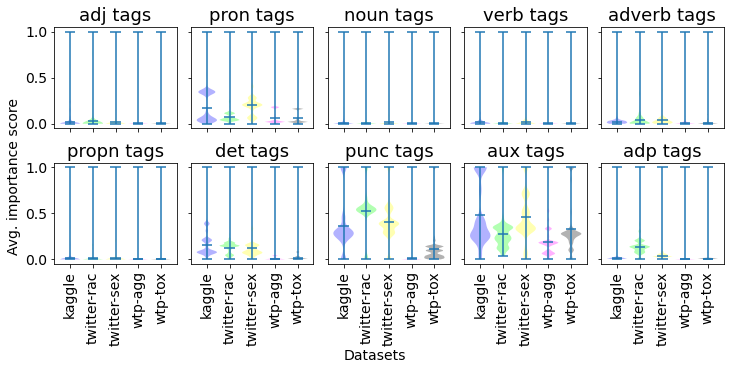

In [216]:
showmeans, showextrema, showmedians = True,True,False
x_scale = "linear" #{"linear", "log", "symlog", "logit", ...}
x_ticks = ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#000000']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

fig, axs = plt.subplots(figsize=(10, 5),ncols=5, nrows=2, sharex=True, sharey=True)
fig.text(0.5, -0.01, 'Datasets', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Avg. importance score', va='center', rotation='vertical', fontsize=14)

#for ax in axs.reshape(-1):
    #ax.set_xticks(np.arange(1, len(x_ticks) + 1))
    #ax.set_xticklabels(x_ticks)
    
adj_coll = [kaggle_adj_ig_df.adj_attribution, 
           twitter_rac_adj_ig_df.adj_attribution,
           twitter_sex_adj_ig_df.adj_attribution,
           wtp_agg_adj_ig_df.adj_attribution,
           wtp_tox_adj_ig_df.adj_attribution]

adj_box = axs[0, 0].violinplot(adj_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF','#000000']
labels=["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"]

for patch, color, label in zip(adj_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
    
axs[0, 0].set_title("adj tags", fontsize=18)
axs[0, 0].set_xscale(x_scale)
axs[0, 0].tick_params(axis="x", labelsize=14)
axs[0, 0].tick_params(axis="y", labelsize=14)
#axs[0, 0].legend([adj_box["bodies"][0],
 #                 adj_box["bodies"][1],
  #                adj_box["bodies"][2],
   #               adj_box["bodies"][3],
    #              adj_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

##############################################################################################################
pron_coll = [kaggle_pron_ig_df.pron_attribution,
            twitter_rac_pron_ig_df.pron_attribution,
            twitter_sex_pron_ig_df.pron_attribution,
            wtp_agg_pron_ig_df.pron_attribution,
            wtp_tox_pron_ig_df.pron_attribution]

pron_box = axs[0, 1].violinplot(pron_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(pron_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 1].set_title("pron tags", fontsize=18)
axs[0, 1].set_xscale(x_scale)
axs[0, 1].tick_params(axis="x", labelsize=14)
axs[0, 1].tick_params(axis="y", labelsize=14)
#axs[0, 1].legend([pron_box["bodies"][0],
 #                 pron_box["bodies"][1],
  #                pron_box["bodies"][2],
   #               pron_box["bodies"][3],
    #              pron_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left", fontsize=12)


######################################################################################################
noun_coll = [kaggle_noun_ig_df.noun_attribution,
             twitter_rac_noun_ig_df.noun_attribution,
             twitter_sex_noun_ig_df.noun_attribution,
             wtp_agg_noun_ig_df.noun_attribution,
             wtp_tox_noun_ig_df.noun_attribution]
noun_box = axs[0, 2].violinplot(noun_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(noun_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 2].set_title("noun tags",fontsize=18)
axs[0, 2].set_xscale(x_scale)
axs[0, 2].tick_params(axis="x", labelsize=14)
axs[0, 2].tick_params(axis="y", labelsize=14)
#axs[0, 2].legend([noun_box["bodies"][0],
 #                 noun_box["bodies"][1],
  #                noun_box["bodies"][2],
   #               noun_box["bodies"][3],
    #              noun_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left", fontsize=12)

################################################################################################################
verb_coll = [kaggle_verb_ig_df.verb_attribution,
             twitter_rac_verb_ig_df.verb_attribution,
             twitter_sex_verb_ig_df.verb_attribution,
             wtp_agg_verb_ig_df.verb_attribution,
             wtp_tox_verb_ig_df.verb_attribution]
verb_box = axs[0, 3].violinplot(verb_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(verb_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 3].set_title("verb tags",fontsize=18)
axs[0, 3].set_xscale(x_scale)
axs[0, 3].tick_params(axis="x", labelsize=14)
axs[0, 3].tick_params(axis="y", labelsize=14)
#axs[0, 3].legend([verb_box["bodies"][0],
 #                 verb_box["bodies"][1],
  #                verb_box["bodies"][2],
   #               verb_box["bodies"][3],
    #              verb_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

##############################################################################################################
adv_coll = [kaggle_adv_ig_df.adv_attribution,
             twitter_rac_adv_ig_df.adv_attribution,
             twitter_sex_adv_ig_df.adv_attribution,
             wtp_agg_adv_ig_df.adv_attribution,
             wtp_tox_adv_ig_df.adv_attribution]
adv_box = axs[0, 4].violinplot(adv_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(adv_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[0, 4].set_title("adverb tags",fontsize=18)
axs[0, 4].set_xscale(x_scale)
axs[0, 4].tick_params(axis="x", labelsize=14)
axs[0, 4].tick_params(axis="y", labelsize=14)
#axs[0, 4].legend([adv_box["bodies"][0],
 #                 adv_box["bodies"][1],
  #                adv_box["bodies"][2],
   #               adv_box["bodies"][3],
    #              adv_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12,bbox_to_anchor=(1.05, 1))

#############################################################################################################
propn_coll = [kaggle_propn_ig_df.propn_attribution,
             twitter_rac_propn_ig_df.propn_attribution,
             twitter_sex_propn_ig_df.propn_attribution,
             wtp_agg_propn_ig_df.propn_attribution,
             wtp_tox_propn_ig_df.propn_attribution]
propn_box = axs[1, 0].violinplot(propn_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(propn_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 0].set_title("propn tags",fontsize=18)
axs[1, 0].set_xscale(x_scale)
axs[1, 0].tick_params(axis="x", labelsize=14)
axs[1, 0].tick_params(axis="y", labelsize=14)
#axs[1, 0].legend([propn_box["bodies"][0],
 #                 propn_box["bodies"][1],
  #                propn_box["bodies"][2],
   #               propn_box["bodies"][3],
    #              propn_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left")

#############################################################################################################
#############################################################################################################
det_coll = [kaggle_det_ig_df.det_attribution,
             twitter_rac_det_ig_df.det_attribution,
             twitter_sex_det_ig_df.det_attribution,
             wtp_agg_det_ig_df.det_attribution,
             wtp_tox_det_ig_df.det_attribution]
det_box = axs[1, 1].violinplot(det_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(det_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 1].set_title("det tags",fontsize=18)
axs[1, 1].set_xscale(x_scale)
axs[1, 1].tick_params(axis="x", labelsize=14)
axs[1,1].tick_params(axis="y", labelsize=14)
#axs[1, 1].legend([det_box["bodies"][0],
 #                 det_box["bodies"][1],
  #                det_box["bodies"][2],
   #               det_box["bodies"][3],
    #              det_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
punc_coll = [kaggle_punc_ig_df.punc_attribution,
             twitter_rac_punc_ig_df.punc_attribution,
             twitter_sex_punc_ig_df.punc_attribution,
             wtp_agg_punc_ig_df.punc_attribution,
             wtp_tox_punc_ig_df.punc_attribution]
punc_box = axs[1, 2].violinplot(punc_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(punc_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 2].set_title("punc tags",fontsize=18)
axs[1, 2].set_xscale(x_scale)
axs[1, 2].tick_params(axis="x", labelsize=14)
axs[1, 2].tick_params(axis="y", labelsize=14)
#axs[1, 2].legend([punc_box["bodies"][0],
 #                 punc_box["bodies"][1],
  #                punc_box["bodies"][2],
   #               punc_box["bodies"][3],
    #              punc_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
aux_coll = [kaggle_aux_ig_df.aux_attribution,
             twitter_rac_aux_ig_df.aux_attribution,
             twitter_sex_aux_ig_df.aux_attribution,
             wtp_agg_aux_ig_df.aux_attribution,
             wtp_tox_aux_ig_df.aux_attribution]
aux_box = axs[1, 3].violinplot(aux_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(aux_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 3].set_title("aux tags",fontsize=18)
axs[1, 3].set_xscale(x_scale)
axs[1, 3].tick_params(axis="x", labelsize=14)
axs[1, 3].tick_params(axis="y", labelsize=14)
#axs[1, 3].legend([aux_box["bodies"][0],
 #                 aux_box["bodies"][1],
  #                aux_box["bodies"][2],
   #               aux_box["bodies"][3],
    #              aux_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12)

#############################################################################################################
adp_coll = [kaggle_adp_ig_df.adp_attribution,
             twitter_rac_adp_ig_df.adp_attribution,
             twitter_sex_adp_ig_df.adp_attribution,
             wtp_agg_adp_ig_df.adp_attribution,
             wtp_tox_adp_ig_df.adp_attribution]
adp_box = axs[1, 4].violinplot(adp_coll,widths=0.9,showmeans=showmeans, showextrema=showextrema, showmedians=showmedians)
colors = colors
labels = labels

for patch, color, label in zip(adp_box['bodies'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
axs[1, 4].set_title("adp tags",fontsize=18)
axs[1, 4].set_xscale(x_scale)
axs[1, 4].tick_params(axis="x", labelsize=14)
axs[1, 4].tick_params(axis="y", labelsize=14)
#axs[1, 4].legend([adp_box["bodies"][0],
 #                 adp_box["bodies"][1],
  #                adp_box["bodies"][2],
   #               adp_box["bodies"][3],
    #              adp_box["bodies"][4]],
     #             ["kaggle", "twitter-rac","twitter-sex","wtp-agg", "wtp-tox"], loc="upper left",fontsize=12,bbox_to_anchor=(1.05, 1))


for ax in axs.reshape(-1):
    ax.set_xticks(np.arange(1, len(x_ticks) + 1))
    ax.set_xticklabels(x_ticks, rotation=90)
#############################################################################################################
fig.tight_layout()

In [217]:
fig.savefig("violin_plot_all_pos_tags_all_data.eps", format='eps',bbox_inches='tight') 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back